# Indian Startups

In [1]:
# importing essential libraries
import numpy as np 
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import warnings

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

sns.set_style('darkgrid')
plt.style.use('ggplot')
%matplotlib inline 

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r"G:\03 - Learnbay\Datasets\Startups.xlsx")
df

,SNo,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors,Investment_Type,Amount(USD),Unnamed: 9
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000,NaN
3040,3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund
3041,3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN
3042,3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


## Data Cleaning

In [4]:
# checking for duplicated values
df.duplicated().any()

False

In [5]:
# checking for null values
df.isnull().sum()

SNo                     0
Date                    0
Startup_Name            0
Industry_Vertical     171
SubVertical           936
City                  180
Investors              24
Investment_Type         4
Amount(USD)           960
Unnamed: 9           2625
dtype: int64

In [6]:
# percentage of null values
x = df.isnull().sum() * 100/ len(df)
null_percent_df = pd.DataFrame({'missing_percent' : x})

null_percent_df.sort_values(by = 'missing_percent', ascending = False)

,missing_percent
Unnamed: 9,86.235217
Amount(USD),31.537451
SubVertical,30.749014
City,5.913272
Industry_Vertical,5.617608
Investors,0.788436
Investment_Type,0.131406
SNo,0.000000
Date,0.000000
Startup_Name,0.000000


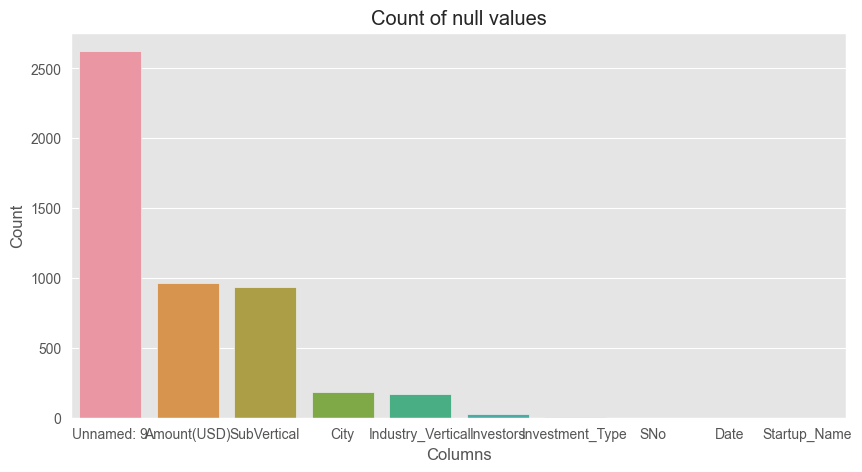

In [7]:
# plotting null values
null = df.isnull().sum().sort_values(ascending = False)

plt.figure(figsize = (10,5), dpi = 100)
sns.barplot(null.index, null.values)
plt.title('Count of null values')
plt.ylabel('Count')
plt.xlabel('Columns')
plt.show()

1. We have a lot of null values here. We'll treat them according to their nature.
2. We can remove 'SubVertical' and 'Unnamed :9' column.
3. Also from the 'Date' column we can only fetch Years. 

In [8]:
# removing unnecessary columns
df.drop(columns = 'Unnamed: 9', inplace = True)
df.drop(columns = 'SubVertical', inplace = True)

# fetching year from 'date' column
def get_year(x):
    return str(x).split('-')[0].strip()

df['Date'] = df['Date'].map(get_year)

# changing column 'Date' to 'Year'
df.rename(columns = {'Date' : 'Year'}, inplace = True)

df.head()

,SNo,Year,Startup_Name,Industry_Vertical,City,Investors,Investment_Type,Amount(USD)
0,1,2020,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,200000000
1,2,2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8048394
2,3,2020,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,18358860
3,4,2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000
4,5,2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000


In [9]:
# there are some inappropriate values in our dataset
df.iloc[2602:2612]

,SNo,Year,Startup_Name,Industry_Vertical,City,Investors,Investment_Type,Amount(USD)
2602,2603,2015,\\xc2\\xa0News in shorts,\\xc2\\xa0News Aggregator mobile app,\\xc2\\xa0Noida,\\xc2\\xa0Tiger Global,Private Equity,"\\xc2\\xa020,000,000"
2603,2604,2015,\\xc2\\xa0Bluestone,\\xc2\\xa0Online Jewellery Store,\\xc2\\xa0Bangalore,"\\xc2\\xa0IvyCap Ventures, Accel Partners, Dra...",Private Equity,"\\xc2\\xa016,200,000"
2604,2605,2015,\\xc2\\xa0Shopsity,\\xc2\\xa0Fashion Info Aggregator App,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A
2605,2606,2015,\\xc2\\xa0Notesgen,\\xc2\\xa0Online Study Notes Marketplace,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,\\xc2\\xa0N/A
2606,2607,2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000"
2607,2608,2015,\\xc2\\xa0Footprints Education,\\xc2\\xa0Pre-School Chain,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,"\\xc2\\xa0685,000"
2608,2609,2015,\\xc2\\xa0Loylty Rewards,\\xc2\\xa0Premium Loyalty Rewards Point Manage...,\\xc2\\xa0Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,"\\xc2\\xa019,350,000"
2609,2610,2015,\\xc2\\xa0Ameyo,\\xc2\\xa0Contact Center Software Platform,\\xc2\\xa0Gurgaon,\\xc2\\xa0Forum Synergies PE Fund,Private Equity,"\\xc2\\xa05,000,000"
2610,2611,2015,\\xc2\\xa0Mamagoto,\\xc2\\xa0Casual Dining restaurant Chain,\\xc2\\xa0New Delhi,\\xc2\\xa0Goldman Sachs,Private Equity,"\\xc2\\xa010,000,000"
2611,2612,2015,\\xc2\\xa0Satvacart,\\xc2\\xa0Online Grocery Delivery,\\xc2\\xa0Gurgaon,\\xc2\\xa0Palaash Ventures,Seed Funding,\\xc2\\xa0N/A


#### Lets deal with these

In [10]:
df['Startup_Name'] = df['Startup_Name'].str.replace('+', '', regex = True)
df['Startup_Name'] = df['Startup_Name'].str.replace('\\', '', regex = True)
df['Startup_Name'] = df['Startup_Name'].str.replace('xc2xa0', '', regex = True)

df['Industry_Vertical'] = df['Industry_Vertical'].str.replace('+', '', regex = True)
df['Industry_Vertical'] = df['Industry_Vertical'].str.replace('\\', '', regex = True)
df['Industry_Vertical'] = df['Industry_Vertical'].str.replace('xc2xa0', '', regex = True)

df['City'] = df['City'].str.replace('+', '', regex = True)
df['City'] = df['City'].str.replace('\\', '', regex = True)
df['City'] = df['City'].str.replace('xc2xa0', '', regex = True)

df['Investors'] = df['Investors'].str.replace('+', '', regex = True)
df['Investors'] = df['Investors'].str.replace('\\', '', regex = True)
df['Investors'] = df['Investors'].str.replace('xc2xa0', '', regex = True)


df.iloc[2602:2612]

,SNo,Year,Startup_Name,Industry_Vertical,City,Investors,Investment_Type,Amount(USD)
2602,2603,2015,News in shorts,News Aggregator mobile app,Noida,Tiger Global,Private Equity,"\\xc2\\xa020,000,000"
2603,2604,2015,Bluestone,Online Jewellery Store,Bangalore,"IvyCap Ventures, Accel Partners, Dragoneer Inv...",Private Equity,"\\xc2\\xa016,200,000"
2604,2605,2015,Shopsity,Fashion Info Aggregator App,Gurgaon,"Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A
2605,2606,2015,Notesgen,Online Study Notes Marketplace,New Delhi,"Rajeev Saraf, Arvind Jha, R. Satya Narayanan",Seed Funding,\\xc2\\xa0N/A
2606,2607,2015,Infinity Assurance,Warranty Programs Service Administration,New Delhi,Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000"
2607,2608,2015,Footprints Education,Pre-School Chain,Gurgaon,"LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,"\\xc2\\xa0685,000"
2608,2609,2015,Loylty Rewards,Premium Loyalty Rewards Point Management,Mumbai,IndianIdeas.com,Private Equity,"\\xc2\\xa019,350,000"
2609,2610,2015,Ameyo,Contact Center Software Platform,Gurgaon,Forum Synergies PE Fund,Private Equity,"\\xc2\\xa05,000,000"
2610,2611,2015,Mamagoto,Casual Dining restaurant Chain,New Delhi,Goldman Sachs,Private Equity,"\\xc2\\xa010,000,000"
2611,2612,2015,Satvacart,Online Grocery Delivery,Gurgaon,Palaash Ventures,Seed Funding,\\xc2\\xa0N/A


In [11]:
# other info
df.dtypes

SNo                   int64
Year                 object
Startup_Name         object
Industry_Vertical    object
City                 object
Investors            object
Investment_Type      object
Amount(USD)          object
dtype: object

#### Important :
1. Amount(USD) is showing as object data type. 
2. We have to convert it into int or float.
3. A total of 960 missing values are there in the 'Amount(USD)'. There are some inappropriate values in this column as well.

In [12]:
# spotting the places where Amount(USD) is inappropriate
s1 = df.loc[(df["Amount(USD)"] == "undisclosed")]
s2 = df.loc[(df["Amount(USD)"] == "Undisclosed")]
s3 = df.loc[(df["Amount(USD)"] == "unknown")]
s4 = df.loc[(df["Amount(USD)"] == "N/A")]

pd.concat([s1,s2,s3,s4])

,SNo,Year,Startup_Name,Industry_Vertical,City,Investors,Investment_Type,Amount(USD)
20,21,2019,Burger Singh,Food and Beverage,Gurgaon,RB Investments,Venture,undisclosed
89,90,2019,Ola Electric,Transport,Bengaluru,Tata Sons,Series A,undisclosed
91,92,2019,StyleDotMe,E-commerce,Delhi,Indian Angel Network and other angel investors...,Bridge Round,undisclosed
58,59,2019,Mishry Reviews,Services,Gurgaon,Vir Sanghvi,Series A,Undisclosed
112,113,2019,FleetX,AI,Gurgaon,India Quotient and LetsVenturexe2x80x99s Angel...,Pre Series A,Undisclosed
139,140,2018,Skillbox,Social Network,Gurugram,Individual investors,Seed Funding,Undisclosed
34,35,2019,The Man Company,Consumer Goods,Gurgaon,Ayushmann Khurana,Corporate Round,unknown


##### We do not know how much  funds they got. So we can either remove them or convert these values to 0 so they do not have any impact. 

In [13]:
# converting to '0'
df.loc[(df["Amount(USD)"] == "undisclosed") | (df["Amount(USD)"] == "Undisclosed") | 
       (df["Amount(USD)"] == "unknown") | (df["Amount(USD)"] == 'N/A') ,"Amount(USD)"] = "0"

In [14]:
# Converting Amount(USD) into float
for i in range (0, len(df["Amount(USD)"])):
    df["Amount(USD)"][i] = re.sub('\D', "", str(df["Amount(USD)"][i]))
    
df["Amount(USD)"] = pd.to_numeric(df["Amount(USD)"])

In [15]:
df.dtypes

SNo                    int64
Year                  object
Startup_Name          object
Industry_Vertical     object
City                  object
Investors             object
Investment_Type       object
Amount(USD)          float64
dtype: object

In [16]:
df[df['Amount(USD)'].isnull()].head()

,SNo,Year,Startup_Name,Industry_Vertical,City,Investors,Investment_Type,Amount(USD)
144,145,2018,Northmist,Fashion,Delhi,Prashant Jaiswal,Seed/ Angel Funding,NaN
155,156,2018,HappyGoEasy,Consumer Internet,Gurugram,"Korea Investment Partners (KIP), Samsung and C...",Private Equity,NaN
157,158,2018,Mad Street Den,Technology,Chennai,KDDI,Private Equity,NaN
165,166,2018,HealthFin,Finance,Pune,"Axilor, Sprout Venture Partners and others",Seed/ Angel Funding,NaN
189,190,2018,Leena AI,Technology,Gurugram,Y Combinator,Seed/ Angel Funding,NaN


In [17]:
df['Amount(USD)'].isnull().sum()

960

1. There are 960 null values in the Amount(USD) column. 
2. Removing them will cause data loss but filling them with mean/median also wouldn't be apt.

In [18]:
# removing the null values from Amount(USD)
df.dropna(subset = ["Amount(USD)"], inplace = True)

In [19]:
# we can also convert Amount(USD) in millions
# formula : amount / 1000000

df['Amount(USD)'] = (df['Amount(USD)'] / 1000000).round(2)
df.head()

,SNo,Year,Startup_Name,Industry_Vertical,City,Investors,Investment_Type,Amount(USD)
0,1,2020,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,200.00
1,2,2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8.05
2,3,2020,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,18.36
3,4,2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3.00
4,5,2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1.80


In [20]:
# changing the column Amount(USD) to Amount(in millions)
df.rename(columns = {'Amount(USD)' : 'Amount(in millions)'}, inplace = True)

#### Cleaning column 'Startup_Name'

In [21]:
# ola
def f7(k):
    if "Ola" in k or "Ola Cabs" in k or "Olacabs" in k:
        k = "Ola"
    return k
df["Startup_Name"] = df["Startup_Name"].apply(f7)


# flipkart
def f8(k):
    if "Flipkart.com" in k:
        k = "Flipkart"
    return k
df["Startup_Name"] = df["Startup_Name"].apply(f8)


# paytm 
def f9(k):
    if "Paytm Marketplace" in k:
        k = "Paytm"
    return k
df["Startup_Name"] = df["Startup_Name"].apply(f9)

# oyo
def f10(k):
    if "OYO" in k or "OYO Rooms" in k or "OyoRooms" in k or 'Oyorooms'  in k or 'Oyo' in k or 'Oyo Rooms' in k:
        k = "OYO Rooms"
    return k
df["Startup_Name"] = df["Startup_Name"].apply(f10)

# BYJU's
def f11(k):
    if "Byjuxe2x80x99s" in  k or "BYJU’S" in k:
        k = "BYJU's"
    return k
df["Startup_Name"] = df["Startup_Name"].apply(f11)

#### Cleaning column 'City'

In [22]:
# dropping null value in City
df.dropna(subset = ['City'], inplace = True)

# Renaming City Names
df.loc[df.City == 'Gurgaon', 'City'] = 'Gurugram'
df.loc[df.City == 'Bengaluru', 'City'] = 'Bangalore'
df.loc[df.City == 'Pune / US', 'City'] = 'Pune'
df.loc[df.City == 'Bangalore / SFO', 'City'] = 'Bangalore'
df.loc[df.City == 'Ahemadabad', 'City'] = 'Ahmedabad'
df.loc[df.City == 'New Delhi / US', 'City'] = 'New Delhi'
df.loc[df.City == 'India/US', 'City'] = 'Misc'
df.loc[df.City == 'Mumbai/Bengaluru', 'City'] = 'Bangalore'
df.loc[df.City == 'Bangalore/ Bangkok', 'City'] = 'Bangalore'
df.loc[df.City == 'San Francisco', 'City'] = 'Misc'
df.loc[df.City == 'Kormangala', 'City'] = 'Bangalore'
df.loc[df.City == 'Boston', 'City'] = 'Bangalore'
df.loc[df.City == 'SFO / Bangalore', 'City'] = 'Bangalore'
df.loc[df.City == 'Dallas / Hyderabad', 'City'] = 'Hyderabad'
df.loc[df.City == 'Pune/Seattle', 'City'] = 'Pune'
df.loc[df.City == 'Pune / Dubai', 'City'] = 'Pune'
df.loc[df.City == 'Mumbai / Global', 'City'] = 'Mumbai'
df.loc[df.City == 'Kerala / USA', 'City'] = 'Kerela'
df.loc[df.City == 'US/India', 'City'] = 'Misc'
df.loc[df.City == 'New York/ India', 'City'] = 'Misc'
df.loc[df.City == 'Bangalore / San Mateo', 'City'] = 'Bangalore'
df.loc[df.City == 'Mumbai / UK', 'City'] = 'Mumbai'
df.loc[df.City == 'Noida / Singapore', 'City'] = 'Noida'
df.loc[df.City == 'USA/India', 'City'] = 'Misc'
df.loc[df.City == 'Mumbai / NY', 'City'] = 'Mumbai'
df.loc[df.City == 'Bangalore / Palo Alto', 'City'] = 'Bangalore'
df.loc[df.City == 'Hyderabad/USA', 'City'] = 'Hyderabad'
df.loc[df.City == 'Gurgaon / SFO', 'City'] = 'Gurugram'
df.loc[df.City == 'Delhi & Cambridge', 'City'] = 'Delhi'
df.loc[df.City == 'Missourie', 'City'] = 'Misc'
df.loc[df.City == 'San Jose', 'City'] = 'Misc'
df.loc[df.City == 'Tulangan', 'City'] = 'Misc'
df.loc[df.City == 'Burnsville', 'City'] = 'Misc'
df.loc[df.City == 'Menlo Park', 'City'] = 'Misc'
df.loc[df.City == 'Palo Alto', 'City'] = 'Misc'
df.loc[df.City == 'Santa Monica', 'City'] = 'Misc'
df.loc[df.City == 'Nairobi', 'City'] = 'Misc'
df.loc[df.City == 'Bengaluru and Gurugram', 'City'] = 'Bangalore'
df.loc[df.City == 'India/Singapore', 'City'] = 'Misc'
df.loc[df.City == 'New York, Bengaluru', 'City'] = 'Bangalore'
df.loc[df.City == 'California', 'City'] = 'Misc'
df.loc[df.City == 'India', 'City'] = 'Misc'
df.loc[df.City == 'Kerala', 'City'] = 'Kerela'
df.loc[df.City == 'New York', 'City'] = 'Misc'
df.loc[df.City == 'India / US', 'City'] = 'Misc'
df.loc[df.City == 'Bangalore / USA', 'City'] = 'Bangalore'
df.loc[df.City == 'Kerala', 'City'] = 'Kerela'
df.loc[df.City == 'New Delhi', 'City'] = 'Delhi'

#### Cleaning column 'Industry_Vertical'

In [23]:
# renaming
df.rename(columns = {'Industry_Vertical' : 'Industry'}, inplace = True)

# dropping null values
df.dropna(subset = ['Industry'], inplace = True)

# E-Commerce
def f1(s):
    if "ECommerce" in s or "eCommerce" in s or "Ecommerce" in s or "ecommerce" in s or"E-Commerce" in s or "OnlineMarketplace" in s:
        s = "E-Commerce"
    return s
df["Industry"] = df["Industry"].apply(f1)

# Transportation
def f2(s):
    if "LastMileTransportation" in s or "Transport" in s or "Transportation&LogisticsPlatform" in s:
        s = "Transportation"
    return s
df["Industry"] = df["Industry"].apply(f2)

# Finance
def f3(s):
    if "finan" in s or "Finan" in s:
        s = "Finance"
    return s
df["Industry"] = df["Industry"].apply(f3)

# Health
def f4(s):
    if "Health" in s or "health" in s:
        s = "Health"
    return s
df["Industry"] = df["Industry"].apply(f4)

# Technology
def f5(s):
    if "FinTech" in s:
        s = "Technology"
    return s   
df["Industry"] = df["Industry"].apply(f5)

# B2B
def f6(s):
    if "B2B" in s:
        s = "B2B"
    return s
df["Industry"] = df["Industry"].apply(f6)

#### Cleaning column 'Investors'

In [24]:
# removing null values
df.dropna(subset = ['Investors'], inplace = True)

In [25]:
# cleaning
def investor(y):
    y = y.strip()    
    if y == 'undisclosed' or y == 'undisclosed investors' or y == 'undisclosed investor' or y == 'Undisclosed':
        return 'Others'
    else:
        return y
df["Investors"] = df["Investors"].apply(investor)

#### Cleaning column 'Investors_Type'

In [26]:
# removing null value
df.dropna(subset = ['Investment_Type'], inplace = True)

df.isnull().sum()

SNo                    0
Year                   0
Startup_Name           0
Industry               0
City                   0
Investors              0
Investment_Type        0
Amount(in millions)    0
dtype: int64

##### We have treated all the null values successfully. Now we can move forward for Analysis. 

## Analysis

##### 1. Total number of Startups funded in each year.

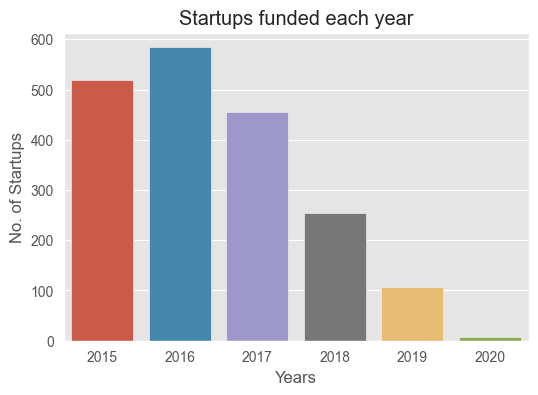

In [27]:
# will count the years and their no. of occurences
value, counts = np.unique(df['Year'], return_counts = True)

# plotting
plt.figure(figsize = (6,4), dpi = 100)
sns.barplot(x = value, y = counts)
plt.title('Startups funded each year')
plt.xlabel('Years')
plt.ylabel('No. of Startups')
plt.show()

##### 2. Trend of Investments over the years

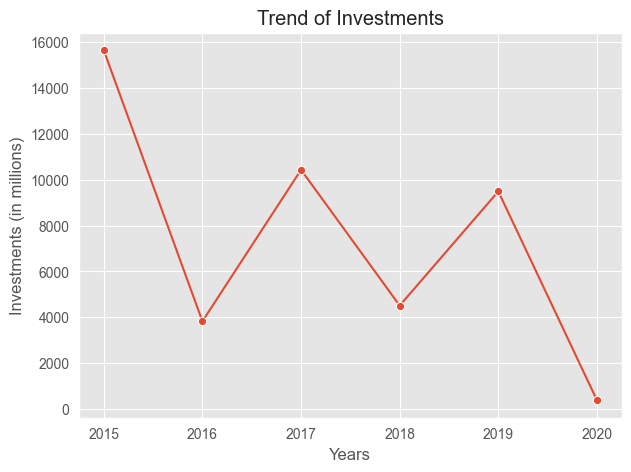

In [28]:
# For checking check the trend, we have to find investments done in each year.

investments = df.groupby('Year')['Amount(in millions)'].sum()

# years
year = [2015,2016,2017,2018,2019,2020]

# plotting a lineplot to see the trend
plt.figure(figsize = (7,5), dpi = 100)
sns.lineplot(year, investments, marker = 'o')
plt.title('Trend of Investments')
plt.xlabel('Years')
plt.ylabel('Investments (in millions)')
plt.show()

##### 3. Startups with highest fundings.

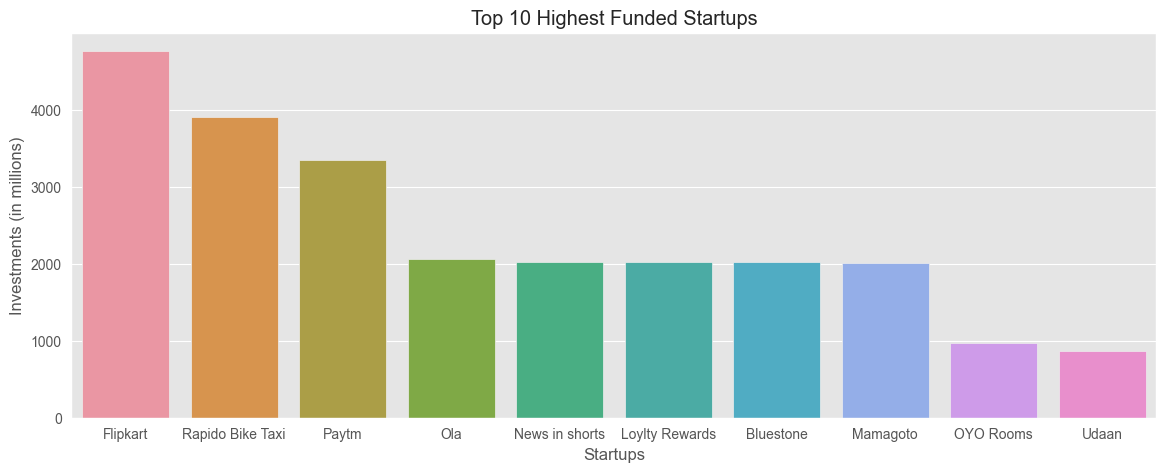

In [29]:
funds = df.groupby('Startup_Name')['Amount(in millions)'].sum()

# Top 10 Startups with highest fundings
top_10 = funds.sort_values(ascending = False).head(10)

# plotting
plt.figure(figsize = (14,5), dpi = 100)
sns.barplot(top_10.index, top_10.values)
plt.title('Top 10 Highest Funded Startups')
plt.ylabel('Investments (in millions)')
plt.xlabel('Startups')

plt.show()

##### 4. Top 10 Indian Cities which have most number of startups.

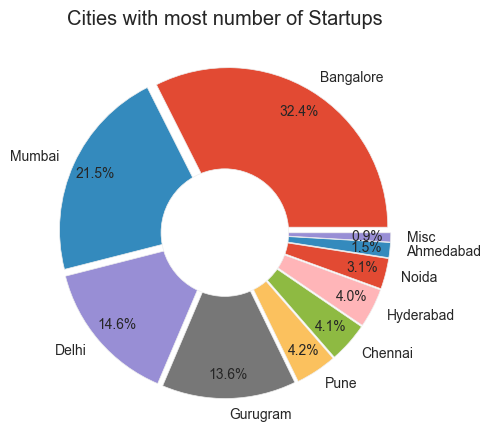

In [31]:
cities = df.City.value_counts()
top_10_cities = cities[:10]

# plotting
plt.figure(figsize = (5,5), dpi = 100)
explode = [0.04 for i in top_10_cities.index]
plt.pie(top_10_cities.values, labels = top_10_cities.index, 
        explode = explode, autopct = '%1.1f%%', pctdistance = 0.85)

centre_circle = plt.Circle((0,0), 0.40, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  
plt.tight_layout()

plt.title('Cities with most number of Startups')
plt.show()

##### 5. Top 10 Indian Cities with highest fundings

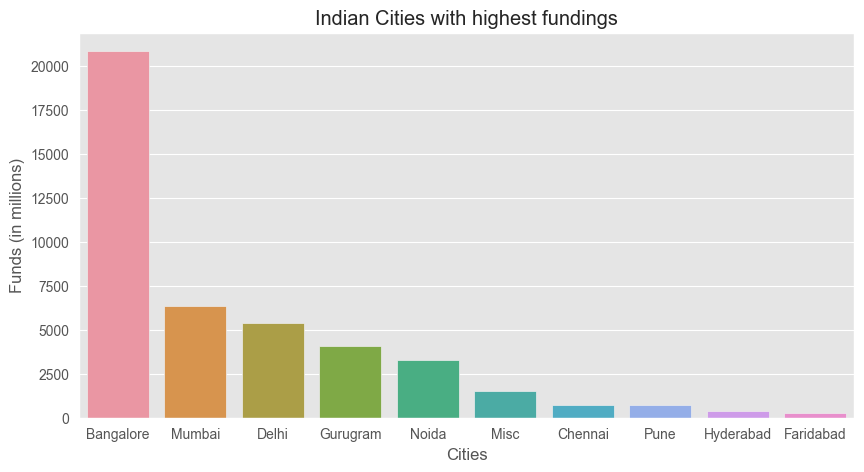

In [32]:
city_funds = df.groupby('City')['Amount(in millions)'].sum()
top_10_city_funds = city_funds.sort_values(ascending = False)[:10]

# plotting
plt.figure(figsize = (10,5), dpi = 100)
sns.barplot(top_10_city_funds.index, top_10_city_funds.values)
plt.title('Indian Cities with highest fundings')
plt.xlabel('Cities')
plt.ylabel('Funds (in millions)')

plt.show()

##### 6. Top Industries for Startups

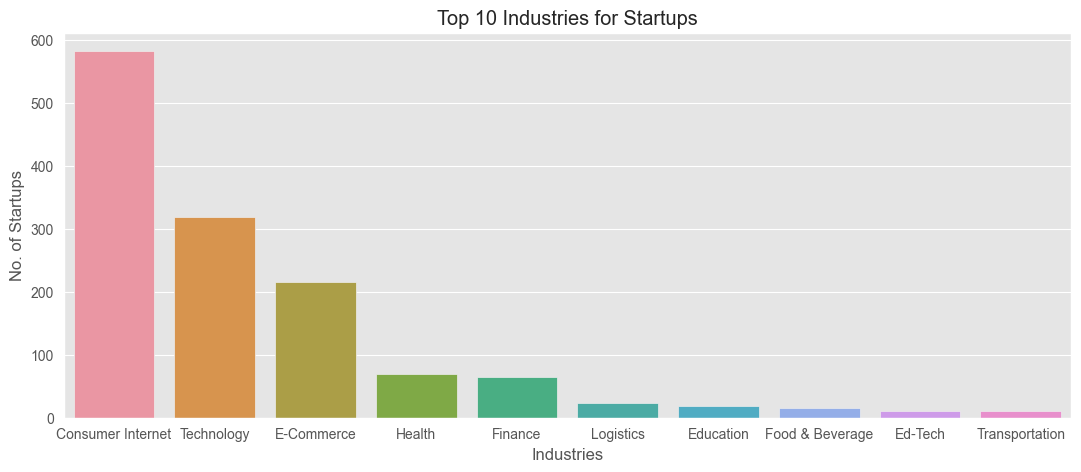

In [33]:
# Top 10 Industries
top_10_ind = df.Industry.value_counts()[:10]

# plotting
plt.figure(figsize = (13,5), dpi = 100)
sns.barplot(top_10_ind.index, top_10_ind.values)
plt.title('Top 10 Industries for Startups')
plt.xlabel('Industries')
plt.ylabel('No. of Startups')
plt.show()

##### 7. Top 7 Industries with highest fundings

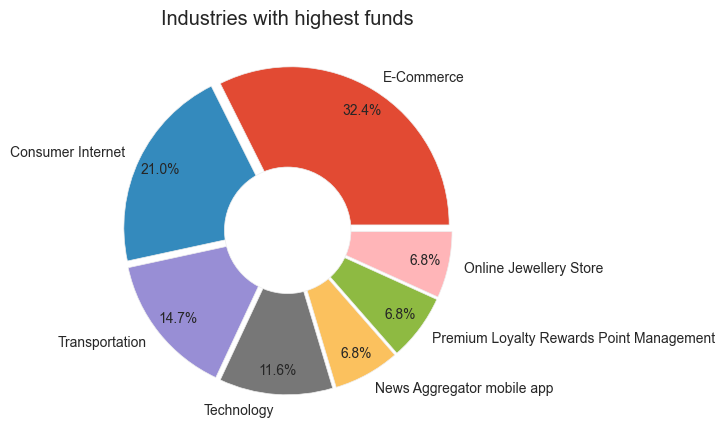

In [34]:
funds_industries = df.groupby('Industry')['Amount(in millions)'].sum()
top_7_fund_ind = funds_industries.sort_values(ascending = False).head(7)

# plotting
plt.figure(figsize = (7,7), dpi = 100)
explode = [0.04 for i in top_7_fund_ind.index]
plt.pie(top_7_fund_ind.values, labels = top_7_fund_ind.index, 
        explode = explode, autopct = '%1.1f%%', pctdistance = 0.85)

centre_circle = plt.Circle((0,0), 0.40, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  
plt.tight_layout()

plt.title('Industries with highest funds')
plt.show()

##### 8. Top Investors who have invested maximum number of times.

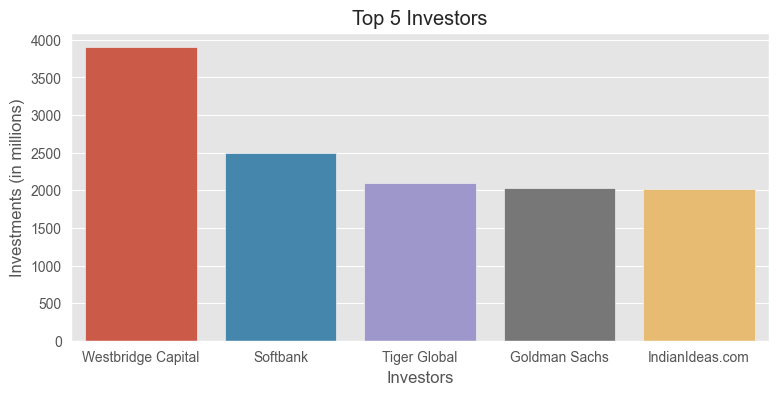

In [35]:
top_investors = df.groupby('Investors')['Amount(in millions)'].sum()
top_5_investors = top_investors.sort_values(ascending = False).head(5)

# plotting
plt.figure(figsize = (9,4), dpi = 100)
sns.barplot(top_5_investors.index, top_5_investors.values)
plt.title('Top 5 Investors')
plt.xlabel('Investors')
plt.ylabel('Investments (in millions)')
plt.show()

##### 9. Frequent Investors

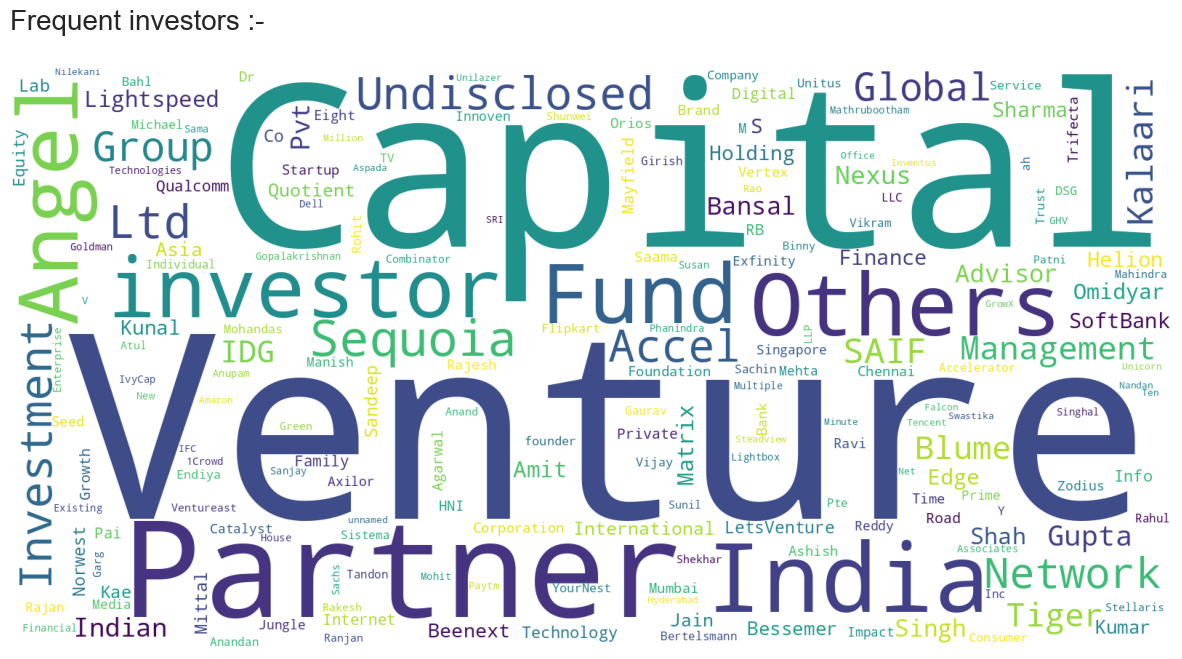

In [36]:
investors = df.Investors

word_cloud = WordCloud(max_words = 200, width = 1600, height = 800, collocations = False, 
                       background_color = 'white').generate(' '.join(investors))
plt.figure(figsize = (15,8))
plt.imshow(word_cloud)
plt.title("Frequent investors :-\n", fontsize = 20, loc = 'left')
plt.axis("off")
plt.show()